In [1]:
import os
print(os.getcwd())

C:\Users\Nicolò\Documents\GitHub\DWM-Project\Progetto


In [2]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [3]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [4]:
data.drop(['homepage'],axis=1,inplace=True)

### data["genres"]

In [5]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [7]:
convertAll(data)


E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [8]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [9]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'to', 'convince', 'herself', 'reach', 'husband.', 'own', 'the', 'slowly', 'everyone', 'at', 'Seven', 'life.', 'unborn', 'Bagchi.', 'London', 'that', 'exist.', 'and', 'child', 'memories', 'city', 'truth', 'relentless', 'she', 'Bagchi', 'find', 'a', 'soaked', 'when', 'fragments', 'on', 'pregnant', 'what', '(Vidya', 'of', 'even', 'seem', 'except', 'husband', 'determined', 'Kolkata', 'him,', 'seems.', 'nothing', 'unravel', 'not', 'In', 'about', 'in', 'realises', 'Balan)', 'begins', 'missing', 'Arnab', 'alone', 'it', 'clues', 'does', 'rely', 'lies,', 'Vidya', 'all', 'festive', 'end', 'is', 'cost', 'months', 'for', 'dead', 'city,', 'her', '-', 'arrives', 'With', 'She', 'tries', 'search', 'from'}


In [10]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [11]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [12]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [13]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

data_with_budget.shape: (2188, 22)


Text(0.5, 1.0, 'Revenue based on budget per movie')

In [15]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

666

In [16]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

E:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


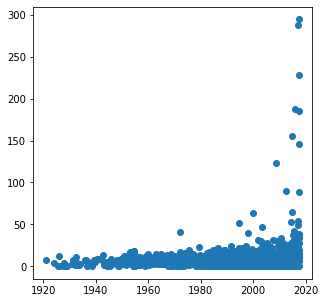

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [18]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


In [19]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


(1960, 2021.8)

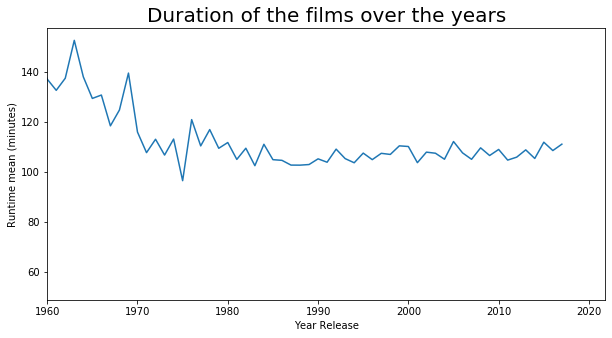

In [20]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [21]:
#Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue. 
#Visto che i valori hanno un range molto diverso bisogna prima normalizzarli portandoli in un range 0-1
#Usiamo la formula (x-min(x))/(max(x)-min(x))

In [22]:
#creo un funzione che aggiunge una colonna al database con il campo normalizzato

def normalizza(data, campo):
    #data[campo+"Norm"]=(data[campo]-data[campo].min())/(max(data[campo])-min(data[campo]))
    data[campo+"Norm"]=data[campo]
    
normalizza(data,"popularity")
normalizza(data,"budget")
normalizza(data,"runtime")

#DA FIXARE: fillare valori nan con media al posto dello 0
data.runtimeNorm=data.runtimeNorm.fillna(0)

data.isna().sum()
          

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [23]:
data_test.title=data_test.title.fillna("")


In [24]:
#trovo tutte le compagnie di produzione dei film e le metto nella lista pc
pc = []
for lista_compagnie in data['production_companies']:
    if not isinstance(lista_compagnie, float):
        for compagnia in lista_compagnie:
            if compagnia['name'] not in pc:
                pc.append(compagnia['name'])
            
print(pc)

['Charles Chaplin Productions', 'First National Pictures', 'Douglas Fairbanks Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'An Erich von Stroheim Production', 'Goskino Productions', 'Mosfilm', 'Pickford Corporation', 'BIM Distribuzione', 'Fox Film Corporation', 'Mary Pickford Company', 'Vicomte de Noailles', 'Universal Pictures', 'United Artists', 'The Caddo Company', 'Paramount Pictures', 'RKO Radio Pictures', 'Warner Bros.', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Selznick International Pictures', 'Roy Export Company Establishment', 'Paramount', 'Republic Pictures', 'Rainbow Productions', 'Diana Productions, Inc.', 'Fritz Lang Productions', 'Majestic Films', 'Gainsborough Pictures', 'Sydney Box Productions', 'Transatlantic Pictures', 'Monterey Productions', 'Charles K. Feldman Group', 'Argosy Pictures', 'London Film Productions', 'British Lion Film Corporation', 'The Criterion Collection', 'Independent Film Distributors', 'Romulus Films', 'Toho Company', 'Walt Disn

In [30]:
#stampo tutti i film che sono stati prodotti dalla Disney e li aggiungo ad una lista
#cerco nelle case di produzione tutte quelle che contengano Disney nel nome
#Walt Disney Pictures
list_Disney=[]

i=0
n_elem = data.shape[0]
while i<n_elem:
    if not isinstance(data["production_companies"][i], float):
        for compagnia in data["production_companies"][i]:
            if not isinstance(compagnia, float):
                if compagnia['name'].find('Disney')!=-1:
                    list_Disney.append(i)
    i+=1
 
print(list_Disney)

[1, 8, 52, 121, 155, 155, 155, 155, 155, 188, 309, 314, 335, 357, 357, 461, 585, 684, 712, 734, 734, 735, 791, 803, 804, 804, 804, 804, 824, 881, 922, 941, 941, 974, 1041, 1042, 1063, 1145, 1164, 1169, 1222, 1229, 1249, 1270, 1272, 1323, 1362, 1377, 1392, 1393, 1393, 1394, 1547, 1570, 1612, 1624, 1743, 1856, 1862, 1918, 1932, 1962, 1976, 2047, 2097, 2126, 2135, 2209, 2284, 2429, 2442, 2472, 2562, 2629, 2669, 2669, 2707, 2738, 2738, 2739, 2771, 2806, 2850, 2858, 2866, 2899, 2899, 2943]


In [32]:
#Per ogni membro del cast è indicato il sesso: 1 se donna, 2 se uomo, 0??
data['MFRatio']=float('NaN')

for i in list_Disney:
    n_male=1
    n_female=1
    for person in data['cast'][i]:
        if person['gender']==1:
            n_female+=1
        elif person['gender']==2:
            n_male+=1    
    data['MFRatio'][i]=n_male/n_female

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [71]:
#creo il dataframe con solo i film della Disney
film_Disney=data

film_Disney.sort_values(by=['release_date'], ascending = True, inplace = True)

film_Disney=film_Disney.dropna(subset=['MFRatio'])


In [73]:
film_Disney.shape[0]


74

Text(0.5, 1.0, 'Male Female ratio in Disney films')

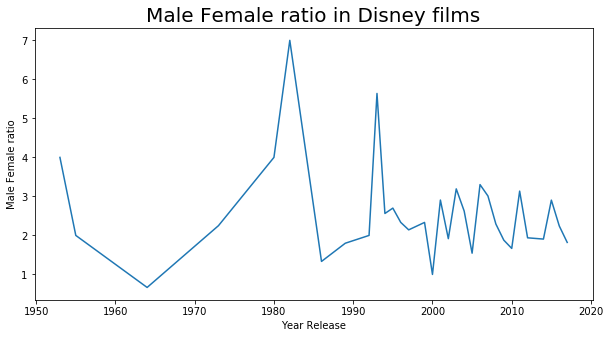

In [76]:
grupByMovies=film_Disney['MFRatio'].groupby(film_Disney["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Male Female ratio", fontsize=10)
x.set_title('Male Female ratio in Disney films', fontsize=20)

